In [1]:
## Import Libraries

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Read Dataset

df = pd.read_csv("HRDataset_v14.csv")
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
## Shape of dataset

df.shape

(311, 36)

In [4]:
## Duplicate values in dataset

df[df['EmpID'].duplicated()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [5]:
## Empty Values

df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
## Dataframe details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

WHAT IS THE SALARY DISTRIBUTION ?

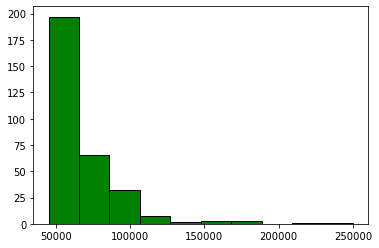

In [7]:
plt.hist(df['Salary'],
        facecolor='green',
        edgecolor='black',
        bins=10)

plt.show()

n:  [197.  65.  32.   7.   2.   3.   3.   0.   1.   1.]
bins:  [ 45046.   65541.4  86036.8 106532.2 127027.6 147523.  168018.4 188513.8
 209009.2 229504.6 250000. ]
patches:  <a list of 10 Patch objects>


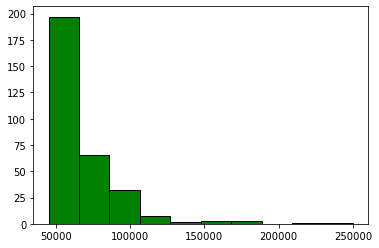

In [8]:
n, bins, patches = plt.hist(df['Salary'],
        facecolor='green',
        edgecolor='black',
        bins=10)

print("n: ",n)
print("bins: ",bins)
print("patches: ",patches)

HOW IS SALARY DISTRIBUTED 'AREA SALES MANAGER ' OR 'PRODUCTION MANGER ' ?

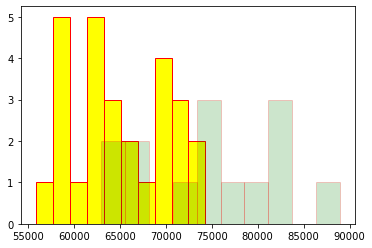

In [9]:
area_mng = df.query("Position == 'Area Sales Manager'")

prod_mng = df.query("Position == 'Production Manager'")

plt.hist(area_mng['Salary'],
        facecolor='yellow',
        edgecolor='red',
        bins=10)

plt.hist(prod_mng['Salary'],
        facecolor='green',
        edgecolor='red',
        bins=10,
        alpha=0.2)

plt.show()



WHAT IS THE PROPORTION OF RECRUITMENT CHANNELS?

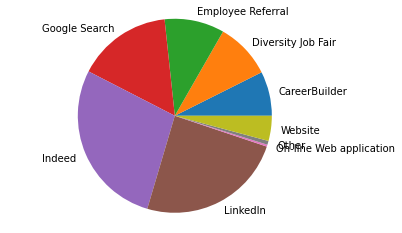

In [10]:
rec_src_df = pd.DataFrame(df.groupby('RecruitmentSource')['EmpID'].count().reset_index())

plt.pie(rec_src_df['EmpID'],labels=rec_src_df['RecruitmentSource'])

plt.axis('equal')

plt.show()

WHAT IS THE PROPORTION OF EMPLOYEES ACROSS DEPARTMENTS?

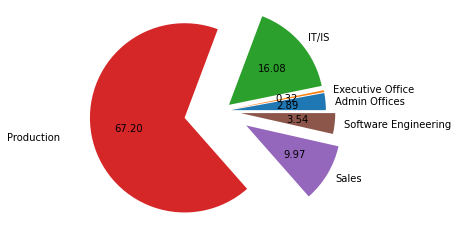

In [11]:
dept_df = pd.DataFrame(df.groupby('Department')['EmpID'].count().reset_index())

explode = (0.1,0.1,0.1,0.4,0.3,0.2)

plt.pie(dept_df['EmpID'],labels=dept_df['Department'],autopct='%.2f',explode=explode)

plt.axis('equal')

plt.show()

WHAT IS THE RATE OF TERMINATION OVER THE YEARS?

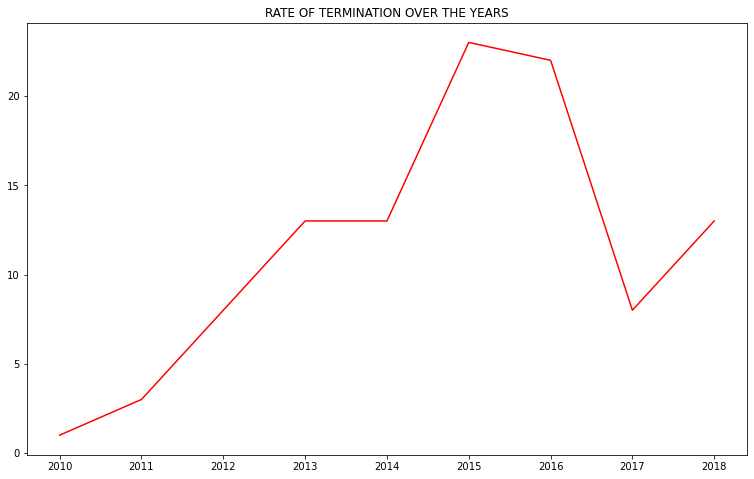

In [12]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])

df['YearofTermination'] = pd.DatetimeIndex(df['DateofTermination']).year

term_df = pd.DataFrame(df.groupby('YearofTermination')['EmpID'].count().reset_index())

fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(term_df['YearofTermination'],term_df['EmpID'],color='red')

plt.title("RATE OF TERMINATION OVER THE YEARS")

plt.show()

WHAT IS THE RATE OF HIRING vs TERMINATION OVER THE YEARS?

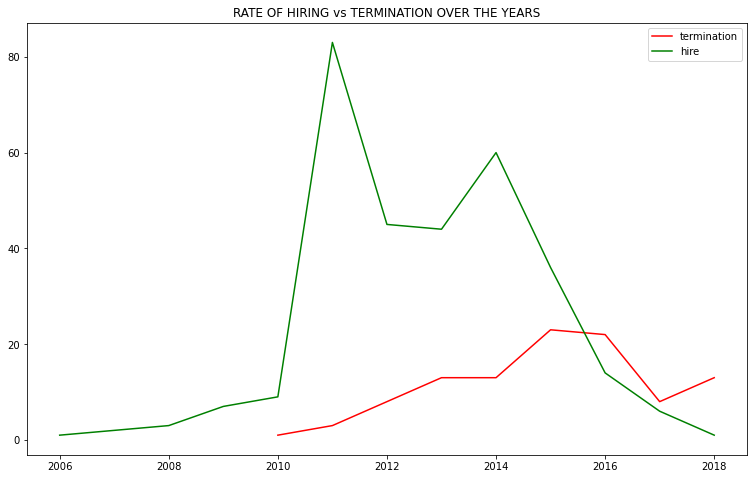

In [13]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

df['YearofHire'] = pd.DatetimeIndex(df['DateofHire']).year

hire_df = pd.DataFrame(df.groupby('YearofHire')['EmpID'].count().reset_index())

fig = plt.figure(figsize = (10,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(term_df['YearofTermination'],term_df['EmpID'],color='red',label='termination')

ax.plot(hire_df['YearofHire'],hire_df['EmpID'],color='green',label='hire')

plt.title("RATE OF HIRING vs TERMINATION OVER THE YEARS")

plt.legend()

plt.show()

HOW IS THE PERFORMANCE OF EMPLOYEES?

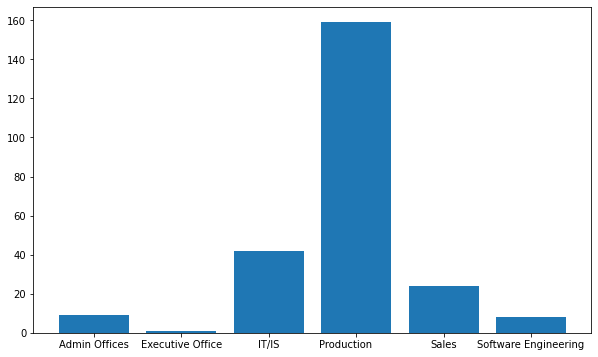

In [14]:
dept_perf_df = pd.DataFrame(df.groupby(['Department','PerformanceScore'])['EmpID'].count().reset_index())

fig = plt.figure(figsize=(10,6))

plt.bar(dept_perf_df['Department'],dept_perf_df['EmpID'])

plt.show()

WHAT IS THE GENDER RATIO IN THE DEPARTMENTS?

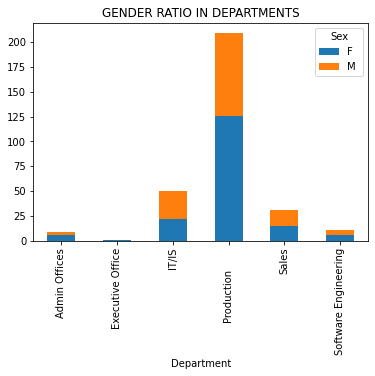

In [15]:
dept_sex_df = pd.DataFrame(df.groupby(['Department','Sex'])['EmpID'].count().reset_index(name='counts'))

dept_sex_df.pivot_table(index = 'Department', columns = 'Sex' , values = 'counts').plot(kind = 'bar', stacked = True)

plt.title("GENDER RATIO IN DEPARTMENTS")
plt.show()

WHAT IS THE RACIAL DIVERSITY IN THE COMPANY?

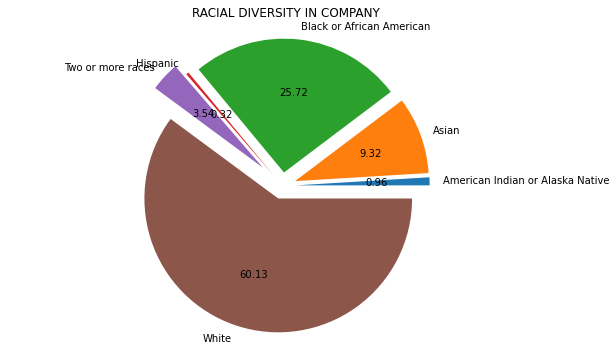

In [16]:
race_df = pd.DataFrame(df.groupby('RaceDesc')['RaceDesc'].count().reset_index(name='count'))

fig = plt.figure(figsize=(10,6))

explode = (0.1,0.1,0.1,0.1,0.2,0.1)

plt.title("RACIAL DIVERSITY IN COMPANY")

plt.pie(race_df['count'],labels=race_df['RaceDesc'],autopct='%.2f',explode=explode)

plt.axis('equal')

plt.show()

TRMINATION REASONS - INSPECTION

In [17]:
df.TermReason.value_counts()

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
relocation out of area                5
return to school                      5
no-call, no-show                      4
performance                           4
military                              4
retiring                              4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64

14 employees terminated because they were unhappy - they explicitly mentioned it. Let's investigate that.

In [18]:
unhappy_df = df[df['TermReason'] == 'unhappy']

In [19]:
unhappy_df.Department.value_counts()

Production           14
Name: Department, dtype: int64

All 14 employees belonged to PRODUCTION department.


In [20]:
unhappy_df.Sex.value_counts()

F     9
M     5
Name: Sex, dtype: int64

In [21]:
unhappy_df.Position.value_counts()

Production Technician I     7
Production Technician II    6
Production Manager          1
Name: Position, dtype: int64

Production Technician position seems to have more in number

In [22]:
unhappy_df['YearsofService'] = unhappy_df['YearofTermination'] - unhappy_df['YearofHire']

<ipython-input-22-4300fb85cbb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unhappy_df['YearsofService'] = unhappy_df['YearofTermination'] - unhappy_df['YearofHire']


In [23]:
unhappy_df.YearsofService.value_counts()

1.0    3
2.0    3
4.0    3
3.0    2
5.0    2
7.0    1
Name: YearsofService, dtype: int64

In [24]:
unhappy_df[unhappy_df['YearsofService'] == 7]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,YearofTermination,YearofHire,YearsofService
168,"Linares, Marilyn",10186,1,1,0,5,5,3,0,52624,...,Fully Meets,3.18,4,0,3/2/2018,0,16,2018.0,2011,7.0


An employee worked for 7 years and the reason was unhappy for termination.

In [25]:
unhappy_df.RaceDesc.value_counts()

White                        9
Asian                        3
Black or African American    2
Name: RaceDesc, dtype: int64

In [26]:
unhappy_df.PerformanceScore.value_counts()

Fully Meets          10
Needs Improvement     2
Exceeds               1
PIP                   1
Name: PerformanceScore, dtype: int64

Most of the employees were up to mark for their work

In [27]:
unhappy_df.EmpSatisfaction.value_counts()

3    5
4    4
5    3
2    2
Name: EmpSatisfaction, dtype: int64

Employee Satisfaction seems to be ok as well

In [28]:
unhappy_df.SpecialProjectsCount.value_counts()

0    14
Name: SpecialProjectsCount, dtype: int64

None of these employeees were in Special Projects

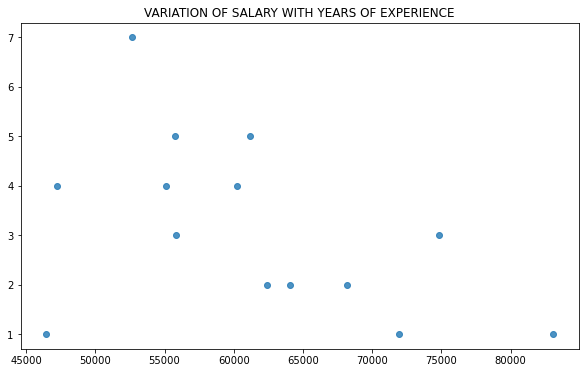

In [29]:
fig = plt.figure(figsize=(10,6))

plt.title("VARIATION OF SALARY WITH YEARS OF EXPERIENCE")

plt.scatter(unhappy_df['Salary'],unhappy_df['YearsofService'],alpha=0.8)

plt.show()

It looks like employees with less years of experience have higher salary than the ones with less years of experience